<a href="https://colab.research.google.com/github/SukruthiAnil/Mood-Analysis-of-Song-Lyrics-NLP/blob/main/MoodAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lyricwikia
!pip install nltk
!pip install sentence_transformers
!pip install wordcloud

  Preparing metadata (setup.py) ... done
  Created wheel for lyricwikia: filename=lyricwikia-0.1.11-py3-none-any.whl size=4416 sha256=154cdcd746d7fcd6c5ae16690557d53508d89c891269e8770343603568871757
  Stored in directory: /root/.cache/pip/wheels/c6/23/83/2a3c5a0f2d75baba2fb1ffb04686dcc696d034cae0043c8393
Successfully built lyricwikia
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.6 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=78b7b622f67c64de223c4320a556228e890b329e11730cbe4d663655bc666ec2
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import *
import pandas as pd
import math
from collections import Counter
import json
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import random
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from tensorflow import keras
import tensorflow as tf

from wordcloud import WordCloud




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
InputData=pd.read_csv("/content/drive/MyDrive/song.csv")

In [ ]:
stemmer = PorterStemmer()
# a mapping dictionary that help remove punctuations
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
def get_tokens(text):
  # turn document into lowercase
  lowers = text.lower()
  # remove punctuations
  no_punctuation = lowers.translate(remove_punctuation_map)
  # tokenize document
  tokens = nltk.word_tokenize(no_punctuation)
  # remove stop words
  filtered = [w for w in tokens if not w in stopwords.words('english')]
  # stemming process
  stemmed = []
  for item in filtered:
    stemmed.append(stemmer.stem(item))
  # final unigrams
  return stemmed

In [ ]:
text_df=InputData["lyrics"]
stem_df=[]
for t in text_df:
    tokens=get_tokens(t)
    stem_df.append(tokens)
stem_df

[['alright',
  'might',
  'littl',
  'glare',
  'stare',
  'ho',
  'didnt',
  'know',
  'like',
  'stare',
  'right',
  'back',
  'nigga',
  'warnin',
  'comin',
  'react',
  'like',
  'mack',
  'act',
  'cool',
  'test',
  'caus',
  'aint',
  'jester',
  'suggest',
  'friend',
  'outti',
  'dont',
  'want',
  'make',
  'pal',
  'get',
  'rowdi',
  'doubt',
  'friendship',
  'lip',
  'touch',
  'go',
  'crazi',
  'clutch',
  'sorta',
  'like',
  'schitzo',
  'forget',
  'bro',
  'pal',
  'gal',
  'didnt',
  'mean',
  'fiend',
  'strang',
  'thing',
  'incomprehens',
  'denim',
  'matter',
  'who',
  'em',
  'grab',
  'flooz',
  'im',
  'traffic',
  'dont',
  'laugh',
  'might',
  'girl',
  'im',
  'talkin',
  'didnt',
  'mean',
  'aint',
  'fault',
  'girl',
  'got',
  'caught',
  'aint',
  'fault',
  'girl',
  'got',
  'caught',
  'aint',
  'fault',
  'girl',
  'got',
  'caught',
  'aint',
  'fault',
  'girl',
  'got',
  'caught',
  'aint',
  'fault',
  'girl',
  'got',
  'caught',
  

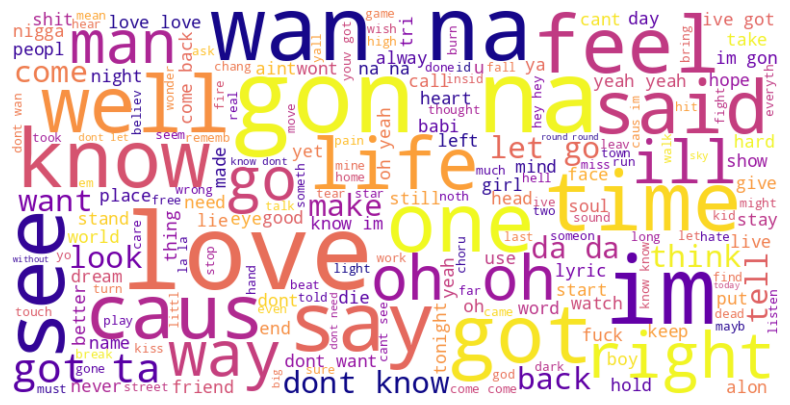

In [ ]:
from wordcloud import WordCloud

all_words = ' '.join([' '.join(tokens) for tokens in stem_df])

wc = WordCloud(
    width=800,
    height=400,
    random_state=21,
    max_font_size=110,
    background_color='white',
    colormap='plasma',
).generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
sentence_df=[]
for stem in stem_df:
    sentence=""
    for word in stem:
        sentence=sentence+ " " +str(word)
    sentence_df.append(sentence)
sentence_df

[' alright might littl glare stare ho didnt know like stare right back nigga warnin comin react like mack act cool test caus aint jester suggest friend outti dont want make pal get rowdi doubt friendship lip touch go crazi clutch sorta like schitzo forget bro pal gal didnt mean fiend strang thing incomprehens denim matter who em grab flooz im traffic dont laugh might girl im talkin didnt mean aint fault girl got caught aint fault girl got caught aint fault girl got caught aint fault girl got caught aint fault girl got caught aint fault girl got caught aint fault girl got caught aint fault girl got caught anoth incid went way beyond done john stop drawer drop didnt aint quittin realli didnt care who girl hittin admit skinz aint reason lose friend didnt know sorri accept apolog live gon na hold grudg well oh fudg new year fear action actin shi mean need smackin hoe instead tryin front know that exactli im goin know run game g know caus entertainin meant blame women makin ak seem call scr

In [ ]:
len(sentence_df)

5471

In [ ]:
#Using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(sentence_df)
X_array = X.toarray()
X_array=pd.DataFrame(X_array)
print(X_array.shape)

(5471, 19465)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_array = label_encoder.fit_transform(InputData["label"])


In [ ]:
X_train_CV, X_val_CV, y_train_CV, y_val_CV = train_test_split(X_array, Y_array, test_size=0.2, random_state=42)
X_train_CV.shape

(4376, 19465)

In [ ]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
sentence_embeddings = sbert_model.encode(sentence_df)
sentence_embeddings=pd.DataFrame(sentence_embeddings)
X_train_bert, X_val_bert, y_train_bert, y_val_bert = train_test_split(sentence_embeddings, Y_array, test_size=0.2, random_state=42)

.gitattributes:   0%|          | 0.00/391 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
#Using n-grams feature extraction
n_grams = CountVectorizer(ngram_range=(1, 2), analyzer="char")
X = n_grams.fit_transform(sentence_df)
X_n_grams_array = X.toarray()
X_n_grams_array=pd.DataFrame(X_n_grams_array)
print(X_n_grams_array.shape)

(5471, 1691)


In [ ]:

Y_n_grams_array = label_encoder.fit_transform(InputData["label"])

In [ ]:

X_train_n_grams, X_val_n_grams, y_train_n_grams, y_val_n_grams = train_test_split(X_n_grams_array, Y_n_grams_array, test_size=0.2, random_state=42)
X_train_CV.shape

(4376, 19465)

In [ ]:
#Using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
#sentence_df = pd.DataFrame({'text': sentence_df})
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(sentence_df)
X_tfidf_array = X_tfidf.toarray()
X_tfidf_df = pd.DataFrame(X_tfidf_array)
print(X_tfidf_df.shape)


(5471, 19465)


In [ ]:
X_train_tfidf, X_val_tfidf, y_train_tfidf, y_val_tfidf = train_test_split(X_tfidf_array, Y_array, test_size=0.2, random_state=42)
X_train_tfidf.shape

(4376, 19465)

In [ ]:
# Using Hash vectorizer
from sklearn.feature_extraction.text import HashingVectorizer
hash_vectorizer = HashingVectorizer(n_features=300)  # You can adjust the number of features as needed
X_hashed = hash_vectorizer.transform(sentence_df)
X_hashed_array = X_hashed.toarray()
X_hashed_df = pd.DataFrame(X_hashed_array)
print(X_hashed_df.shape)

(5471, 300)


In [ ]:
X_train_hash, X_val_hash, y_train_hash, y_val_hash = train_test_split(X_hashed_array, Y_array, test_size=0.2, random_state=42)
X_train_hash.shape

(4376, 300)

In [ ]:
#Using RandomForrest
def rfc_parameter_tune_n_estimators(train_val_X, train_val_y):
  train_val_X=pd.DataFrame(train_val_X)
  train_val_y=pd.DataFrame(train_val_y)
  train_acc_all = []
  val_acc_all = []
  kf = KFold(n_splits = 5)
  train_acc = []
  val_acc = []
  for train_index, val_index in kf.split(train_val_X):
            train_X = train_val_X.iloc[train_index,:]
            val_X = train_val_X.iloc[val_index,:]
            train_y = train_val_y.iloc[train_index]
            val_y = train_val_y.iloc[val_index]
            print("Shapes - Train X:", train_X.shape, " Train y:", train_y.shape)
            rfc = ensemble.RandomForestClassifier(n_estimators=200)
            rfc.fit(train_X, train_y)
            train_acc.append(rfc.score(train_X, train_y))
            val_acc.append(rfc.score(val_X, val_y))
  avg_train_acc = sum(train_acc) / len(train_acc)
  avg_val_acc = sum(val_acc) / len(val_acc)
  train_acc_all.append(avg_train_acc)
  val_acc_all.append(avg_val_acc)
  return train_acc_all, val_acc_all


In [ ]:
def dtc_parameter_tune_min_sample_leaf(train_val_X, train_val_y):
    train_val_X=pd.DataFrame(train_val_X)
    train_val_y=pd.DataFrame(train_val_y)
    train_acc_all = []
    val_acc_all = []
    kf = KFold(n_splits = 5)
    train_acc = []
    val_acc = []
    for train_index, val_index in kf.split(train_val_X):
        train_X = train_val_X.iloc[train_index,:]
        val_X = train_val_X.iloc[val_index,:]
        train_y = train_val_y.iloc[train_index]
        val_y = train_val_y.iloc[val_index]
        print("Shapes - Train X:", train_X.shape, " Train y:", train_y.shape)
        dtc = tree.DecisionTreeClassifier(min_samples_leaf=2)
        dtc.fit(train_X, train_y)
        train_acc_all.append(dtc.score(train_X, train_y))
        val_acc_all.append(dtc.score(val_X, val_y))
    avg_train_acc = sum(train_acc_all) / len(train_acc_all)
    avg_val_acc = sum(val_acc_all) / len(val_acc_all)
    return avg_train_acc, avg_val_acc

In [ ]:
from sklearn import svm

def svm_parameter_tune_C(train_val_X, train_val_y):
    train_val_X=pd.DataFrame(train_val_X)
    train_val_y=pd.DataFrame(train_val_y)
    train_acc_all = []
    val_acc_all = []
    kf = KFold(n_splits=5)
    train_acc = []
    val_acc = []

    for train_index, val_index in kf.split(train_val_X):
            train_X = train_val_X.iloc[train_index, :]
            val_X = train_val_X.iloc[val_index, :]
            train_y = train_val_y.iloc[train_index]
            val_y = train_val_y.iloc[val_index]
            svc = svm.SVC(C=0.01,max_iter=10)
            svc.fit(train_X, train_y)
            train_acc.append(svc.score(train_X, train_y))
            val_acc.append(svc.score(val_X, val_y))
    avg_train_acc = np.mean(train_acc)
    avg_val_acc = np.mean(val_acc)
    train_acc_all.append(avg_train_acc)
    val_acc_all.append(avg_val_acc)
    return train_acc_all, val_acc_all

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
import numpy as np

def xgboost_parameter_tune_eta(train_val_X, train_val_y):
    train_val_X=pd.DataFrame(train_val_X)
    train_val_y=pd.DataFrame(train_val_y)
    train_acc_all = []
    val_acc_all = []
    kf = KFold(n_splits=5)
    train_acc = []
    val_acc = []
    for train_index, val_index in kf.split(train_val_X):
            train_X = train_val_X.iloc[train_index, :]
            val_X = train_val_X.iloc[val_index, :]
            train_y = train_val_y.iloc[train_index]
            val_y = train_val_y.iloc[val_index]

            # Create an XGBoost classifier with different learning rates
            xg_reg = xgb.XGBClassifier(learning_rate=0.01)
            xg_reg.fit(train_X, train_y)

            # Calculate accuracy on the training and validation sets
            train_acc.append(xg_reg.score(train_X, train_y))
            val_acc.append(xg_reg.score(val_X, val_y))

    avg_train_acc = np.mean(train_acc)
    avg_val_acc = np.mean(val_acc)
    train_acc_all.append(avg_train_acc)
    val_acc_all.append(avg_val_acc)
    return train_acc_all, val_acc_all


In [ ]:
#Using RandomForrest
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
def gaussian_nb(train_val_X, train_val_y):
  train_val_X=pd.DataFrame(train_val_X)
  train_val_y=pd.DataFrame(train_val_y)
  train_acc_all = []
  val_acc_all = []
  kf = KFold(n_splits = 5)
  train_acc = []
  val_acc = []
  for train_index, val_index in kf.split(train_val_X):
            train_X = train_val_X.iloc[train_index,:]
            val_X = train_val_X.iloc[val_index,:]
            train_y = train_val_y.iloc[train_index]
            val_y = train_val_y.iloc[val_index]
            print("Shapes - Train X:", train_X.shape, " Train y:", train_y.shape)
            gnb = GaussianNB()
            gnb.fit(train_X, train_y)
            train_acc.append(gnb.score(train_X, train_y))
            val_acc.append(gnb.score(val_X, val_y))
  avg_train_acc = sum(train_acc) / len(train_acc)
  avg_val_acc = sum(val_acc) / len(val_acc)
  train_acc_all.append(avg_train_acc)
  val_acc_all.append(avg_val_acc)
  return train_acc_all, val_acc_all


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plotGraph():
  # Names of the models or labels for the x-axis
  models = ['CountVectorizer', 'TF-IDF', 'HashVectorizer', 'BERT']

  # Training accuracy values for each model
  train_acc_values = [train_acc_countvectorizer, train_acc_tfidf, train_acc_hashvectorizer, train_acc_BERT]

  # Validation accuracy values for each model
  val_acc_values = [val_acc_countvectorizer, val_acc_tfidf, val_acc_hashvectorizer, val_acc_BERT]

  # Bar width
  bar_width = 0.35

  # Number of models
  num_models = len(models)

  # Bar positions for each model
  indices = np.arange(len(models))

  # Set up the figure and axis
  fig, ax = plt.subplots(figsize=(10, 6))

  # Grouped bar chart for training and validation accuracy
  for i in range(num_models):
      train_bar = ax.bar(indices[i] - bar_width/2, train_acc_values[i], bar_width, label=f'{models[i]} - Training', color='blue')
      val_bar = ax.bar(indices[i] + bar_width/2, val_acc_values[i], bar_width, label=f'{models[i]} - Validation', color='orange')

  # Add labels, title, and legend
  ax.set_xticks(indices)
  ax.set_xticklabels(models)
  ax.set_xlabel('Models')
  ax.set_ylabel('Accuracy')
  ax.set_title('Training and Validation Accuracy for Different Models Using Random Forest')

  ax.legend(handles=[train_bar, val_bar], labels=['Training Accuracy', 'Validation Accuracy'], loc='upper left', bbox_to_anchor=(1, 1))

  # Show the plot
  plt.show()

In [ ]:
#Using RandomForrest with Countvectorizer
train_acc_all, val_acc_all = rfc_parameter_tune_n_estimators(X_train_CV,y_train_CV)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)
train_acc_countvectorizer = train_acc_all
val_acc_countvectorizer = val_acc_all

Shapes - Train X: (3500, 19465)  Train y: (3500, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Training Accuracy:  [1.0]
Validation Accuracy:  [0.9298421395955643]


In [ ]:
#Randomforrest with TFIDF
train_acc_all, val_acc_all = rfc_parameter_tune_n_estimators(
    X_train_tfidf, y_train_tfidf
)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_tfidf = train_acc_all
val_acc_tfidf = val_acc_all

"""kFold_df = pd.DataFrame()
kFold_df['n_estimators'] = depths
kFold_df['training accuracy'] = train_acc_all
kFold_df['validation accuracy'] = val_acc_all
print(kFold_df)

plt.plot(depths, train_acc_all, marker='.', label="Training accuracy")
plt.plot(depths, val_acc_all, marker='.', label="Validation accuracy")
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()"""

Shapes - Train X: (3500, 19465)  Train y: (3500, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Training Accuracy:  [1.0]
Validation Accuracy:  [0.9307566862361382]


'kFold_df = pd.DataFrame()\nkFold_df[\'n_estimators\'] = depths\nkFold_df[\'training accuracy\'] = train_acc_all\nkFold_df[\'validation accuracy\'] = val_acc_all\nprint(kFold_df)\n\nplt.plot(depths, train_acc_all, marker=\'.\', label="Training accuracy")\nplt.plot(depths, val_acc_all, marker=\'.\', label="Validation accuracy")\nplt.xlabel(\'Number of Estimators\')\nplt.ylabel(\'Accuracy\')\nplt.legend()\nplt.show()'

In [ ]:
#Using RandomForrest with HashVectorizer
train_acc_all, val_acc_all = rfc_parameter_tune_n_estimators(X_train_hash,y_train_hash)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_hashvectorizer = train_acc_all
val_acc_hashvectorizer = val_acc_all

Shapes - Train X: (3500, 300)  Train y: (3500, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 300)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 300)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 300)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 300)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Training Accuracy:  [1.0]
Validation Accuracy:  [0.9312138290932811]


Shapes - Train X: (3500, 768)  Train y: (3500, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 768)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 768)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 768)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 768)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Using RandomForrest with BERT
Training Accuracy:  [1.0]
Validation Accuracy:  [0.9467545988258317]


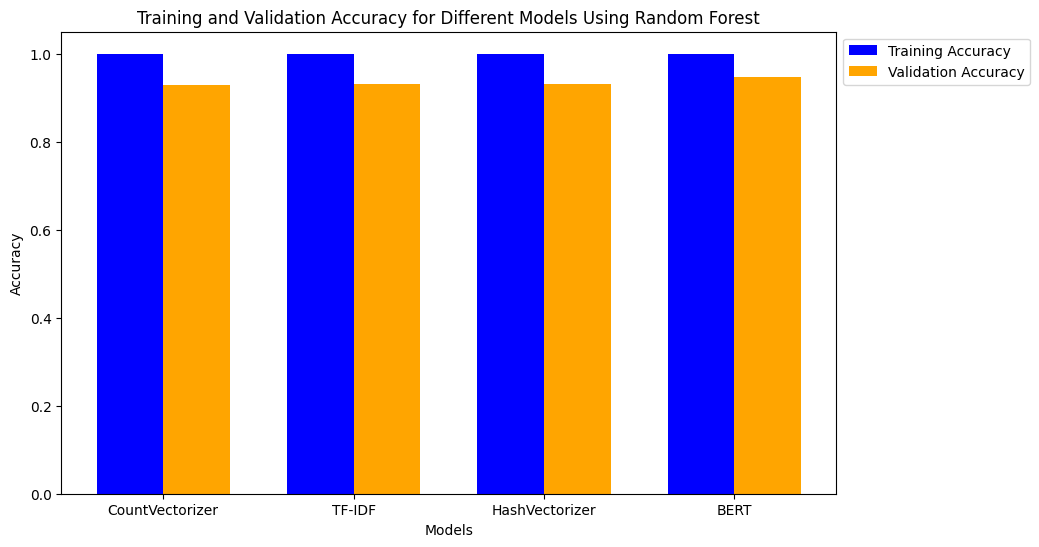

In [ ]:
#Using RandomForrest with BERT
train_acc_all, val_acc_all = rfc_parameter_tune_n_estimators(X_train_bert,y_train_bert)
print("Using RandomForrest with BERT")
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_BERT = train_acc_all
val_acc_BERT = val_acc_all
plotGraph()

In [ ]:
#Using RandomForrest with n-grams
train_acc_all, val_acc_all = rfc_parameter_tune_n_estimators(X_train_n_grams,y_train_n_grams)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_ngrams = train_acc_all
val_acc_ngrams = val_acc_all



Shapes - Train X: (3500, 1691)  Train y: (3500, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 1691)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 1691)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 1691)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 1691)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Training Accuracy:  [1.0]
Validation Accuracy:  [0.9348709719504239]


In [ ]:
#DTC with Countvectorizer
train_acc_all, val_acc_all = dtc_parameter_tune_min_sample_leaf(X_train_CV, y_train_CV)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)
train_acc_countvectorizer = train_acc_all
val_acc_countvectorizer = val_acc_all

Shapes - Train X: (3500, 19465)  Train y: (3500, 1)
Shapes - Train X: (3501, 19465)  Train y: (3501, 1)
Shapes - Train X: (3501, 19465)  Train y: (3501, 1)
Shapes - Train X: (3501, 19465)  Train y: (3501, 1)
Shapes - Train X: (3501, 19465)  Train y: (3501, 1)
Training Accuracy:  0.9709208960705105
Validation Accuracy:  0.8667712981082843


In [ ]:
#DTC with TFIDF
train_acc_all, val_acc_all = dtc_parameter_tune_min_sample_leaf(X_train_tfidf, y_train_tfidf)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)
train_acc_tfidf = train_acc_all
val_acc_tfidf = val_acc_all

Shapes - Train X: (3500, 19465)  Train y: (3500, 1)
Shapes - Train X: (3501, 19465)  Train y: (3501, 1)
Shapes - Train X: (3501, 19465)  Train y: (3501, 1)
Shapes - Train X: (3501, 19465)  Train y: (3501, 1)
Shapes - Train X: (3501, 19465)  Train y: (3501, 1)
Training Accuracy:  0.9773766352470723
Validation Accuracy:  0.8727154598825833


In [ ]:
#DTC with HashVectorizer
train_acc_all, val_acc_all = dtc_parameter_tune_min_sample_leaf(X_train_hash, y_train_hash)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_hashvectorizer = train_acc_all
val_acc_hashvectorizer = val_acc_all

Shapes - Train X: (3500, 300)  Train y: (3500, 1)
Shapes - Train X: (3501, 300)  Train y: (3501, 1)
Shapes - Train X: (3501, 300)  Train y: (3501, 1)
Shapes - Train X: (3501, 300)  Train y: (3501, 1)
Shapes - Train X: (3501, 300)  Train y: (3501, 1)
Training Accuracy:  0.9767481291059698
Validation Accuracy:  0.8583167645140248


In [ ]:
#DTC with BERT
train_acc_all, val_acc_all = dtc_parameter_tune_min_sample_leaf(X_train_bert,y_train_bert)
print("DTC with BERT")
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_BERT = train_acc_all
val_acc_BERT = val_acc_all

Shapes - Train X: (3500, 768)  Train y: (3500, 1)
Shapes - Train X: (3501, 768)  Train y: (3501, 1)
Shapes - Train X: (3501, 768)  Train y: (3501, 1)
Shapes - Train X: (3501, 768)  Train y: (3501, 1)
Shapes - Train X: (3501, 768)  Train y: (3501, 1)
DTC with BERT
Training Accuracy:  0.9866315093646714
Validation Accuracy:  0.8896245270711024


In [ ]:
#DTC with n-grams
train_acc_all, val_acc_all = dtc_parameter_tune_min_sample_leaf(X_train_n_grams, y_train_n_grams)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_ngrams = train_acc_all
val_acc_ngrams = val_acc_all

Shapes - Train X: (3500, 1691)  Train y: (3500, 1)
Shapes - Train X: (3501, 1691)  Train y: (3501, 1)
Shapes - Train X: (3501, 1691)  Train y: (3501, 1)
Shapes - Train X: (3501, 1691)  Train y: (3501, 1)
Shapes - Train X: (3501, 1691)  Train y: (3501, 1)
Training Accuracy:  0.9818899579711919
Validation Accuracy:  0.876592041748206


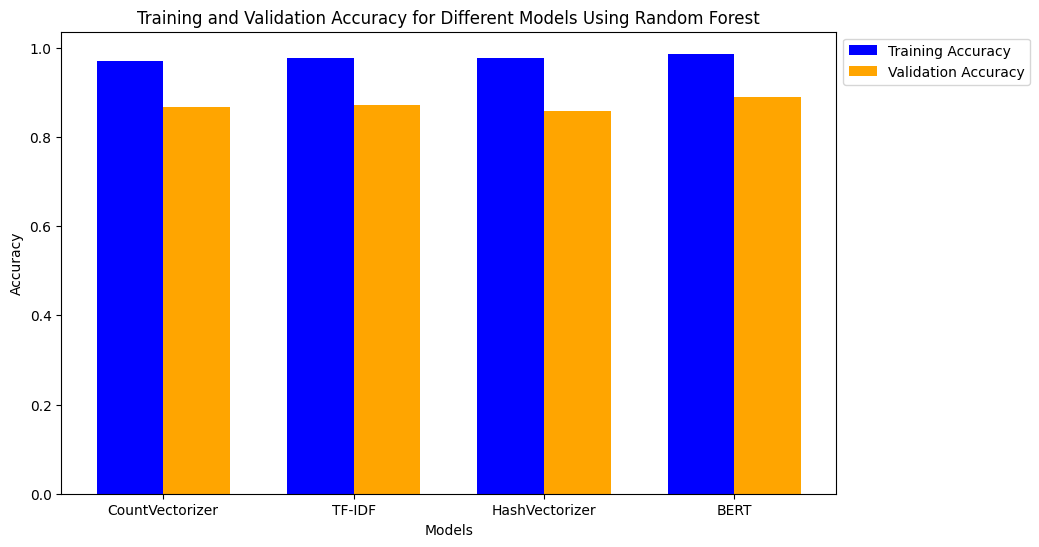

In [ ]:
plotGraph()

In [ ]:
#XGBoost with CountVectorizer
train_acc_all, val_acc_all = xgboost_parameter_tune_eta(X_train_CV, y_train_CV)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_countvectorizer = train_acc_all
val_acc_countvectorizer = val_acc_all

Training Accuracy:  [0.8347804953686702]
Validation Accuracy:  [0.8231261578604044]


In [ ]:
#XGBoost with tfidf
train_acc_all, val_acc_all = xgboost_parameter_tune_eta(X_train_tfidf, y_train_tfidf)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_tfidf = train_acc_all
val_acc_tfidf = val_acc_all

Training Accuracy:  [0.8520339984494226]
Validation Accuracy:  [0.8359212002609263]


In [ ]:
#XGBoost with HashVectorizer
train_acc_all, val_acc_all = xgboost_parameter_tune_eta(X_train_hash, y_train_hash)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_hashvectorizer = train_acc_all
val_acc_hashvectorizer = val_acc_all

Training Accuracy:  [0.8440355000612071]
Validation Accuracy:  [0.8260962818003914]


In [ ]:
#XGBoost with BERT
train_acc_all, val_acc_all = xgboost_parameter_tune_eta(X_train_bert,y_train_bert)
print ("XGBoost with BERT")
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_BERT = train_acc_all
val_acc_BERT = val_acc_all

XGBoost with BERT
Training Accuracy:  [0.9273884849226752]
Validation Accuracy:  [0.8779702544031311]


In [ ]:
#XGBoost with n-grams
train_acc_all, val_acc_all = xgboost_parameter_tune_eta(X_train_n_grams, y_train_n_grams)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_ngrams = train_acc_all
val_acc_ngrams = val_acc_all

Training Accuracy:  [0.8772852491124985]
Validation Accuracy:  [0.8496320939334637]


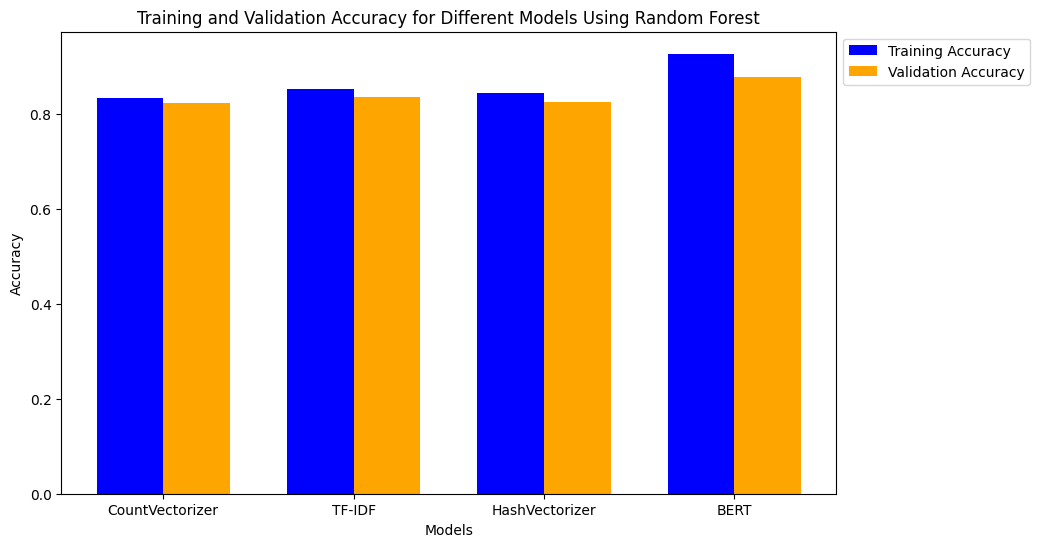

In [ ]:
plotGraph()

In [ ]:
#Using RandomForrest with BERT
train_acc_all, val_acc_all = rfc_parameter_tune_n_estimators(X_train_bert,y_train_bert)
print("Using RandomForrest with BERT")
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

Shapes - Train X: (3500, 768)  Train y: (3500, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 768)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 768)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 768)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Shapes - Train X: (3501, 768)  Train y: (3501, 1)


<ipython-input-26-6375cadfdbe3>:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(train_X, train_y)


Using RandomForrest with BERT
Training Accuracy:  [1.0]
Validation Accuracy:  [0.9472122635355511]


In [ ]:
#bayesian for count vectorier
train_acc_all, val_acc_all = gaussian_nb(X_train_CV,y_train_CV)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_countvectorizer = train_acc_all
val_acc_countvectorizer = val_acc_all


Shapes - Train X: (3500, 19465)  Train y: (3500, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy:  [0.9239029338556332]
Validation Accuracy:  [0.8569422048271363]


In [ ]:
#bayesian for tfidf
train_acc_all, val_acc_all = gaussian_nb(X_train_tfidf,y_train_tfidf)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_tfidf = train_acc_all
val_acc_tfidf = val_acc_all

Shapes - Train X: (3500, 19465)  Train y: (3500, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shapes - Train X: (3501, 19465)  Train y: (3501, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy:  [0.9294445831803158]
Validation Accuracy:  [0.8619705153294195]


In [ ]:
#bayesian for hashvectorizer
train_acc_all, val_acc_all = gaussian_nb(X_train_hash,y_train_hash)
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

train_acc_hashvectorizer = train_acc_all
val_acc_hashvectorizer = val_acc_all

Shapes - Train X: (3500, 300)  Train y: (3500, 1)
Shapes - Train X: (3501, 300)  Train y: (3501, 1)
Shapes - Train X: (3501, 300)  Train y: (3501, 1)
Shapes - Train X: (3501, 300)  Train y: (3501, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Shapes - Train X: (3501, 300)  Train y: (3501, 1)
Training Accuracy:  [0.7397166523850329]
Validation Accuracy:  [0.7045307240704501]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#DTC with BERT
train_acc_all, val_acc_all = dtc_parameter_tune_min_sample_leaf(X_train_bert,y_train_bert)
print("DTC with BERT")
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

Shapes - Train X: (3500, 768)  Train y: (3500, 1)
Shapes - Train X: (3501, 768)  Train y: (3501, 1)
Shapes - Train X: (3501, 768)  Train y: (3501, 1)
Shapes - Train X: (3501, 768)  Train y: (3501, 1)
Shapes - Train X: (3501, 768)  Train y: (3501, 1)
DTC with BERT
Training Accuracy:  0.9868029052923655
Validation Accuracy:  0.8925956947162426


In [ ]:
#XGBoost with BERT
train_acc_all, val_acc_all = xgboost_parameter_tune_eta(X_train_bert,y_train_bert)
print ("XGBoost with BERT")
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)

XGBoost with BERT
Training Accuracy:  [0.9273884849226752]
Validation Accuracy:  [0.8779702544031311]


Shapes - Train X: (3500, 768)  Train y: (3500, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shapes - Train X: (3501, 768)  Train y: (3501, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shapes - Train X: (3501, 768)  Train y: (3501, 1)
Shapes - Train X: (3501, 768)  Train y: (3501, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Shapes - Train X: (3501, 768)  Train y: (3501, 1)
bayesian for BERT
Training Accuracy:  [0.8013596931488962]
Validation Accuracy:  [0.8018731898238748]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


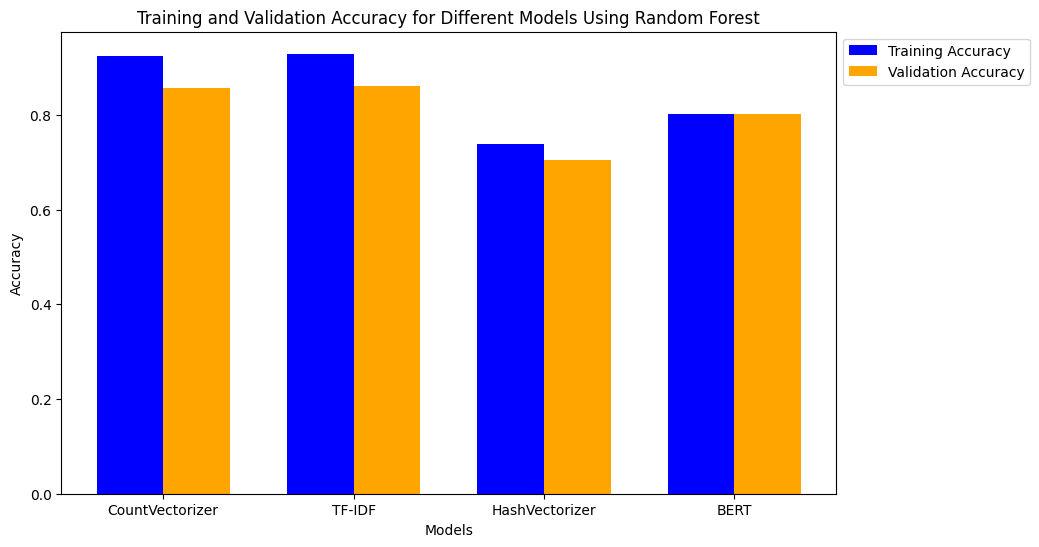

In [ ]:
#bayesian for BERT
train_acc_all, val_acc_all = gaussian_nb(X_train_bert,y_train_bert)
print("bayesian for BERT")
print("Training Accuracy: ", train_acc_all)
print("Validation Accuracy: ", val_acc_all)


train_acc_BERT = train_acc_all
val_acc_BERT = val_acc_all
plotGraph()